In [113]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [114]:
import lanelet2
from lanelet2.core import (AllWayStop, AttributeMap, BasicPoint2d,
                            BoundingBox2d, Lanelet, LaneletMap,
                            LaneletWithStopLine, LineString2d, LineString3d, Point2d, Point3d,
                            BasicPoint2d, BasicPoint3d,
                            RightOfWay, TrafficLight, getId)
from lanelet2.projection import (UtmProjector, MercatorProjector,
                                    LocalCartesianProjector, GeocentricProjector)
from lanelet2.matching import Pose2d, Object2d, ObjectWithCovariance2d, PositionCovariance2d

from lanelet_wrapper import LaneletWrapper

import numpy as np
from util import *
from build_lanelet_map import UI
import matplotlib.pyplot as plt

Loading image from build_lanelet_map/IMG_0098.jpeg


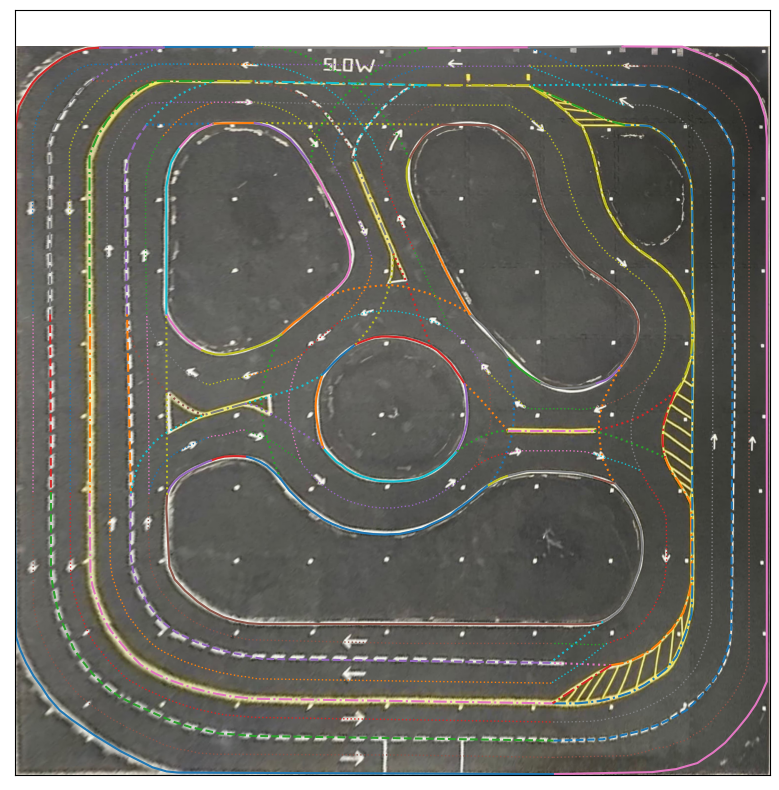

In [115]:
ui = UI("build_lanelet_map/IMG_0098.jpeg", 6.05, 6.05)
wrapper = LaneletWrapper("../../cfg/track.osm")
linestring_layer = wrapper.lanelet_map.lineStringLayer
for linestring in linestring_layer:
    ui.plot_linestring(linestring, update=False)

# loop through lanelets
lanelet_layer = wrapper.lanelet_map.laneletLayer
for lanelet in lanelet_layer:
    # ui.plot_lanelet(lanelet, update=False)
    ui.plot_linestring(lanelet.centerline, update=False)
ui.update_plot()

# create debug lanelet map
map_deub = wrapper.routing_graph.getDebugLaneletMap()
# wrapper.save_lanelet_map(map_deub, "../../cfg/track_route.osm")


In [117]:
# Get a lanelet by id
lanelet = wrapper.lanelet_layer[1032]

# Get the length of the lanelet
L = wrapper.get_lanelet_length(lanelet)
centerline = lanelet.centerline
left_bound = lanelet.leftBound
for pt in centerline:
    print('c ', pt.x, pt.y)
    
for pt in left_bound:
    print('l ', pt.x, pt.y)
    
# Project a point to the centerline
print(wrapper.project_xy_to_linestring(0.2, 3, centerline))


c  0.144529434481631 3.8277530233448793
c  0.1476525027958363 3.089941744954076
c  0.144529434481631 2.348894510381355
l  0.28195111947611146 3.8277530233448815
l  0.28819725610452207 2.3521304665632754
(0.14727438891333391, 3.000222206733457)


In [118]:
l1 = wrapper.lanelet_layer[1267]
l2 = wrapper.lanelet_layer[1203]

path = wrapper.routing_graph.shortestPath(l1, l2)

c = wrapper.get_path_centerline(path)
c=  np.array(c)

# c_index = ui.xy2point(c.T).T
# ui.ax.plot(c_index[:,0], c_index[:,1], '-r')
# ui.fig



End point [5, 2] is not inside a lanelet


(226, 5)


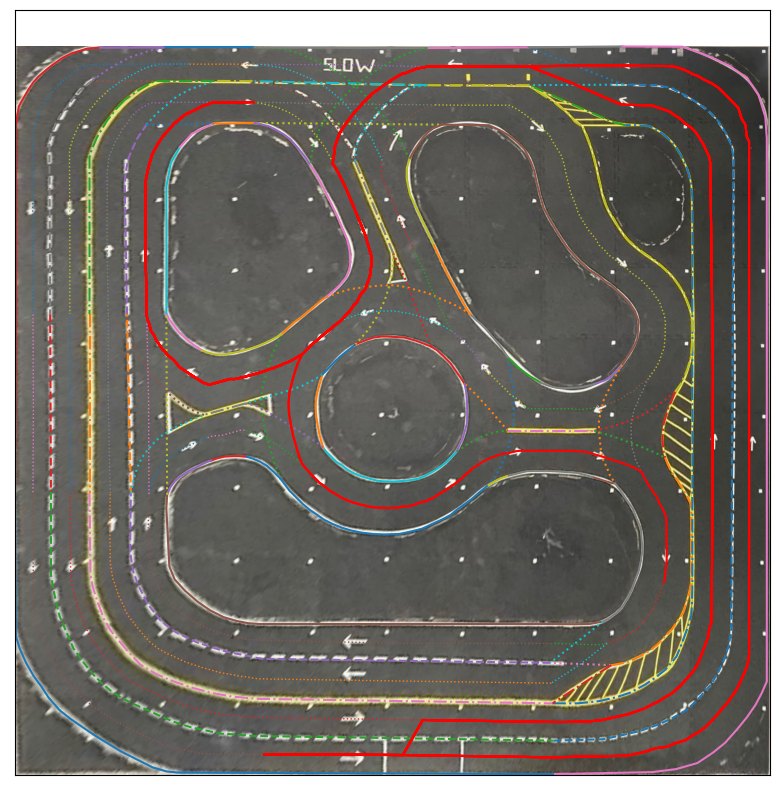

In [136]:
c = wrapper.get_shortest_path(2, 0.1, 5, 2, False)

c=  np.array(c)
print(c.shape)

c_index = ui.xy2point(c.T).T
ui.ax.plot(c_index[:,0], c_index[:,1], '-r')
ui.fig

